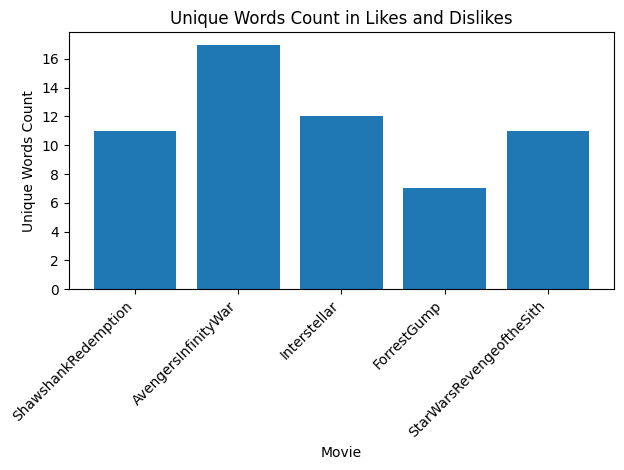

,Movie,Likes,Dislikes,Unique_Words_Count
0,ShawshankRedemption,Cool setting character development likeable ch...,Slow at times Red dies,11
1,AvengersInfinityWar,The good guys lose for once great action scenes,Too many characters hard to follow Macguffin c...,17
2,Interstellar,Cool physics personal connection great music a...,Confusing plot too long,12
3,ForrestGump,Alabama heartwarming story history,Boring at times,7
4,StarWarsRevengeoftheSith,Epic battles cool lightsabers love the prequels,Bad acting weak plot,11


In [2]:
# CS 451
# Coding Practice Session 1
# Last name: Graf
# Email: ndgraf@crimson.ua.edu

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['Movie'] = ['Shawshank Redemption', 'Avengers Infinity War', 'Interstellar', 'Forrest Gump', 'Star Wars Revenge of the Sith']
df['Likes'] = ['Cool setting, character development, likeable characters',
               'The good guys lose for once, great action scenes',
               'Cool physics, personal connection, great music and visuals',
               'Alabama, heartwarming story, history',
               'Epic battles, cool lightsabers, love the prequels']
df['Dislikes'] = ['Slow at times, Red dies',
                  'Too many characters, hard to follow, Macguffin chasing',
                  'Confusing plot, too long',   
                  'Boring at times',
                  'Bad acting, weak plot']

#Strip whitespace from movie titles
df['Movie'] = df['Movie'].str.replace(' ', '', regex=True)

#Strip punctuation from Likes and Dislikes
df['Likes'] = df['Likes'].str.replace('[,.-]', '', regex=True)
df['Dislikes'] = df['Dislikes'].str.replace('[,.-]', '', regex=True)

#Count unique words in Likes and Dislikes
df['Combined'] = df['Likes'] + ' ' + df['Dislikes'] 
df['Unique_Words_Count'] = df['Combined'].str.split().apply(lambda x: len(set(x)))
df.drop(columns=['Combined'], inplace=True)

plt.bar(df['Movie'], df['Unique_Words_Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie')
plt.ylabel('Unique Words Count')
plt.title('Unique Words Count in Likes and Dislikes')
plt.tight_layout()
plt.show()

df 

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
Sepal and Petal Length Correlation: 0.871753775886584
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.1

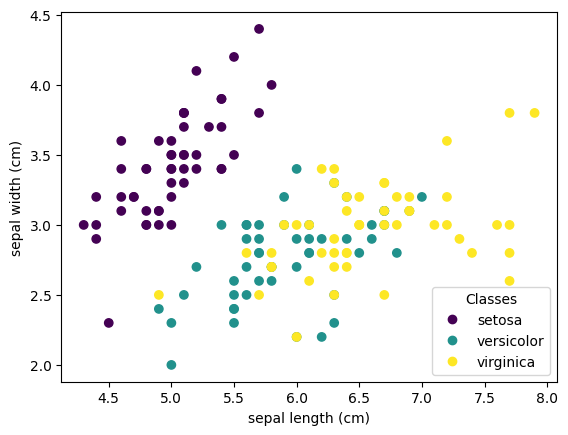

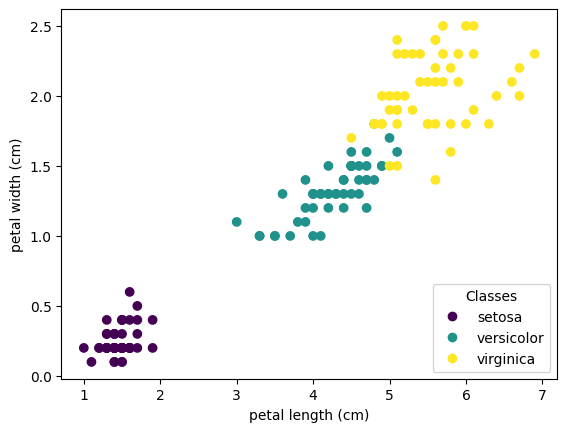

In [9]:
import sklearn
import sys
from names_dataset import NameDataset, NameWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#Insert median row

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
stats = df.describe()
print(stats)

#Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(data=scaled_data, columns=iris.feature_names)
scaled_df

#Print correlation matrix with heatmap:
corr_matrix = scaled_df.corr()

print(f"Sepal and Petal Length Correlation: {corr_matrix.iloc[0,2]}")

print(corr_matrix)

print("Nathaniel Graf ndgraf@crimson.ua.edu")

nd = NameDataset()
print(NameWrapper(nd.search('Nathaniel')).describe)